In [22]:
#setup
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import scipy.stats as sstats
from sklearn import tree


import graphviz
from sklearn.model_selection import train_test_split

In [2]:
#load Titanic data
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1).dropna()
titanic_df['Sex'] = pd.Categorical(titanic_df['Sex']).codes
titanic_df['Embarked'] = pd.Categorical(titanic_df['Embarked']).codes

In [95]:
def crossvalidation(X, Y, k=10, criterion='gini', max_depth=100):
    '''
    X, Y - np.arrays
    k - # of times crossvalidating
    returns average score on testing set
    '''
    size = len(X) // k
    score = 0
    
    for i in range(k):
        test_X = X[i*size : (i+1)*size]
        test_Y = Y[i*size : (i+1)*size]
        
        train_X = np.append(X[:i*size], X[(i+1)*size:]).reshape(-1, test_X.shape[1])
        train_Y = np.append(Y[:i*size], Y[(i+1)*size:])

        t = build_tree(train_X, train_Y, criterion=criterion, max_depth=max_depth)
        
        score += t.score(test_X, test_Y)
    return score / k

## Zadanie 2.
W pakiecie SciKit do Pythona dostępnych jest kilka popularnych algorytmów klasyfikacji danych przy użyciu drzew klasyfikacyjnych. Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu. Do rysowania drzew użyj programu Graphviz.

a) Jaką miarę różnorodności stosuje algorytm konstrukcji drzew klasyfikujących użyty w skrypcie? Dla danych Titanic sporządź drzewa klasyfikacyjne stosując indeks Giniego oraz entropię.

b) Podziel dane Titanic na dane uczące i dane testowe (jak w zadaniu 1b), stwórz drzewa klasyfikacyjne na danych uczących i przetestuj na danych testowych.

c) Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

e) Zrób cross validation wszystkich tworzonych w tym zadaniu klasyfikatorów na zestawie danych Titanic.

### a) Jaką miarę różnorodności stosuje algorytm konstrukcji drzew klasyfikujących użyty w skrypcie? Dla danych Titanic sporządź drzewa klasyfikacyjne stosując indeks Giniego oraz entropię.

In [96]:
def build_tree(X, Y, criterion='gini', max_depth=100):
    t = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    t.fit(X, Y)
    return t

def draw_tree(tree_, feature_names, target_names, name):
    dot_data = tree.export_graphviz(tree_, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render(name) 
    dot_data = tree.export_graphviz(tree_, out_file=None, 
                     feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

In [97]:
X = titanic_df.drop(['Survived'], axis=1).dropna()
Y = titanic_df['Survived']

In [101]:
c = 'gini'
t = build_tree(X, Y, criterion=c)
print(f'Score: {t.score(X, Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
# draw_tree(t, X.columns, ['0', '1'], 'titanic-gini')

Score: 0.9859550561797753
Crossvalidation: 0.7633802816901407


In [102]:
c = 'entropy'
t = build_tree(X, Y, criterion=c)

print(f'Score: {t.score(X, Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
# draw_tree(t, X.columns, ['0', '1'], 'titanic-entropy')

Score: 0.9859550561797753
Crossvalidation: 0.7746478873239437


### b) Podziel dane Titanic na dane uczące i dane testowe (jak w zadaniu 1b), stwórz drzewa klasyfikacyjne na danych uczących i przetestuj na danych testowych.

In [10]:
train_df, test_df = train_test_split(titanic_df, test_size=0.3333)
train_X = train_df.drop(['Survived'], axis=1).dropna()
train_Y = train_df['Survived']
test_X = test_df.drop(['Survived'], axis=1).dropna()
test_Y = test_df['Survived']

In [103]:
c = 'gini'
t = build_tree(train_X, train_Y, criterion=c)
print(f'Score of training set: {t.score(train_X, train_Y)}')
print(f'Score of training set: {t.score(test_X, test_Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
# draw_tree(t, train_X.columns, ['0', '1'], 'titanic-gini')

Score of training set: 0.989451476793249
Score of training set: 0.7436974789915967
Crossvalidation: 0.7676056338028169


In [104]:
c = 'entropy'
t = build_tree(train_X, train_Y, criterion=c)
print(f'Score of training set: {t.score(train_X, train_Y)}')
print(f'Score of training set: {t.score(test_X, test_Y)}')
print(f'Crossvalidation: {crossvalidation(X, Y, criterion=c)}')
# draw_tree(t, train_X.columns, ['0', '1'], 'titanic-gini')

Score of training set: 0.989451476793249
Score of training set: 0.7352941176470589
Crossvalidation: 0.7718309859154929


### c) Spróbuj ograniczyć głębokość drzewa. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

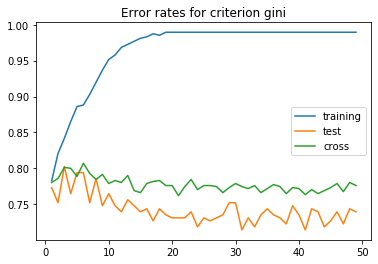

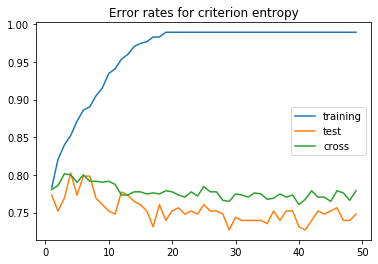

In [105]:
MAX_DEPTHS = np.arange(1, 50)
score_tra = np.zeros(len(MAX_DEPTHS))
score_tes = np.zeros(len(MAX_DEPTHS))
score_cross = np.zeros(len(MAX_DEPTHS))
CRITERIONS = ['gini', 'entropy']

for criterion in CRITERIONS:
    for i, md in enumerate(MAX_DEPTHS):
        t = build_tree(train_X, train_Y, criterion=criterion, max_depth=md)
        score_tra[i] = t.score(train_X, train_Y)
        score_tes[i] = t.score(test_X, test_Y)
        score_cross[i] = crossvalidation(X, Y, max_depth=md)

    plt.figure()
    plt.title(f'Error rates for criterion {criterion}')
    plt.plot(MAX_DEPTHS, score_tra, label='training')
    plt.plot(MAX_DEPTHS, score_tes, label='test')
    plt.plot(MAX_DEPTHS, score_cross, label='cross')
    plt.legend(loc='right')

### d) Spróbuj przyciąć drzewo techniką omawianą na wykładzie lub własną. Zobacz jak wpływa to na wyniki (zarówno na danych uczących jak i na danych testowych).

In [38]:
TODO

NameError: name 'TODO' is not defined